In [80]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style
import json
import matplotlib.colors as mcolors

# Utils

In [81]:
def get_maires_dict() -> dict:
    
    mairesDict = {
    "Stephane JAY" : [1896, 1904],
    "Charles RIVAIL" : [1904, 1908],
    "Felix VIALLET" : [1908, 1910],
    "Nestor CORNIER" : [1910, 1919],
    "Paul MISTRAL" : [1919, 1932],
    "Leon MARTIN" : [1932, 1935],
    "Paul COCAT" : [1935, 1944],
    "Frederic LAFLEUR" : [1944, 1945],
    "Leon MARTIN" : [1945, 1947],
    "Marius BALLY" : [1947, 1948],
    "Remy PERINETTI" : [1948, 1949],
    "Leon MARTIN" : [1949, 1959],
    "Albert MICHALLON" : [1959, 1965],
    "Hubert DUBEDOUT" : [1965, 1983],
    "Alain CARIGNON" : [1983, 1995],
    "Michel DESTOT" : [1995, 2014],
    "Eric PIOLLE" : [2014, 2021],
}
    return mairesDict

In [82]:
# Couleurs diverses
VERT='\033[0;32m' # vert mince
BLANC='\033[1;37m' # blanc gras
DEFAUT='\033[0;m' # couleur console par defaut
NOIR='\033[0;30m' # noir mince
ROUGE='\033[0;31m' # rouge mince
MARRON='\033[0;33m' # marron mince
BLEU='\033[0;34m' # bleu fonce mince
VIOLET='\033[0;35m' # violet mince
CYAN='\033[0;36m' # cyan mince
GRIS='\033[0;37m' # gris clair mince
BLANCLEGER='\033[0;38m' # blanc mince
ROUGECLAIR='\033[1;31m' # rouge clair gras
VERTCLAIR='\033[1;32m' # vert clair gras
JAUNE='\033[1;33m' # jaune gras
BLEUCLAIR='\033[1;34m' # bleu clair gras
ROSE='\033[1;35m' # rose clair gras
CYANCLAIR='\033[1;36m' # cyan clair gras

In [83]:
def change_column_name(df:pd.DataFrame) -> pd.DataFrame:
    valid = {"yes": True, "y": True, "ye": True, "Yes":True, "no": False, "n": False, "No": False}
    newNameList = []
    for col in df.columns.tolist():
        print(CYAN, "Do you want do rename the column", ROUGECLAIR, col,CYAN, "y / n")
        res = input()
        
        if res in list(valid.keys()):
        
            if valid[res] == True:
                print(ROUGECLAIR, "New name....")
                newName = input().upper()
                newNameList.append(newName)

            elif valid[res] == False:
                newNameList.append(col)
        else:
            print(ROUGECLAIR, "You exit the program")
            return df
        
    print(VERTCLAIR, newNameList)    
    df.columns = newNameList
    return df

In [84]:
genus_prbm = ['Betula', 'Castanea', 'Cupressus', 'Fraxinus','Olea', 'Platanus', 'Aesculus'] 
sp_prbm = ['Acer saccharinum', 'Albizzia julibrissin', 'Catalpa bignonioides', 'Ginko biloba',
           'Gleditsia triacanthos', 'Koelreuteria paniculata', 'Laburnum anagyroides', 'Paulownia tomentosa',
           'Prunus pissardi', 'Sophora japonica', 'Acer platanoides', 'Acer pseudoplatanus', 'Betula costata',
           'Betula davurica', 'Betula davurica','Betula jacquemonti','Betula lenta','Betula pendula', 'Betula maximowicziana',
           'Betula pubescens', 'Betula utilis', 'Cryptomeria japonica', 'Cupressus cashmeriana', 'Davidia involucrata',
           'Fagus sylvatica', 'Juglans nigra', 'Juglans ailantifolia', 'Liriodendron tulipifera', 'Magnolia grandiflora',
           'Nerium oleander', 'Picea abies', 'Populus alba', 'Quercus bicolor', 'Quercus macrocarpa','Quercus nigra',
           'Quercus rubra', 'Quercus alba', 'Salix gracolistyla', 'Salix daphnoides', 'Salix cinerea', 'Salix arenaria',
           'Salix alba', 'Salix acutifolia', 'Sorbus aucuparia', 'Platanus acerifolia', 'Acer platanoides',
           'Acer pseudoplatanus'] 
# supporte mal la secheresse ou le gel ou à eviter dans la metro par soucis de diversification des essences
sp_inv = ['Ailanthus altissima', 'Robinia pseudoacacia', "Acer negundo"] 

# I - Import data

In [85]:
# This csv is imported with a value added in the last ligne
# There was originally a missing value
# Here in a csv : In last rows / col 1 : 30032 was added
file_path = '../data/ESP_PUBLIC.IDENTITE_ARBRE.csv'
df = pd.read_csv(file_path, sep=',', header = 0, index_col=False)
dff = df

# II - Computations

##### Missing years for plantation

In [86]:
# Convert the column year from FLOAT --> INT
# --> Not working because of Nan : dff["ANNEEDEPLANTATION"].astype("int")
missingYear = dff["ANNEEDEPLANTATION"].isnull().value_counts()[1]
numberOfTree = dff["ANNEEDEPLANTATION"].size

print(CYANCLAIR, "Total of Trees -->", BLEUCLAIR, numberOfTree, \
      CYANCLAIR, "<-- with total of -->", BLEUCLAIR, missingYear,\
      CYANCLAIR, "<-- missing years")

 Total of Trees -->  31613  <-- with total of -->  1438  <-- missing years


##### Total of trees for specific year

In [87]:
# First replace the .nan by float(0)
# After that convert float to int
dff["ANNEEDEPLANTATION"].fillna(0).astype("int")

0        1977
1        2001
2        1975
3        1978
4        1960
         ... 
31608    2014
31609    2014
31610    2014
31611    2014
31612    1995
Name: ANNEEDEPLANTATION, Length: 31613, dtype: int64

In [88]:
firstYearPlanted = int(dff["ANNEEDEPLANTATION"].min())
lastYearPlanted = int(dff["ANNEEDEPLANTATION"].max())
print(CYANCLAIR, "The first tree was planted in -->", BLEUCLAIR, firstYearPlanted)
print(CYANCLAIR, "The last tree was planted in --->", BLEUCLAIR, lastYearPlanted)

 The first tree was planted in -->  1900
 The last tree was planted in --->  2021


##### Study by years

In [89]:
df_years = dff[["ANNEEDEPLANTATION"]]
df_years.value_counts()

ANNEEDEPLANTATION
1975.0               3631
2001.0               1488
1980.0               1445
1970.0               1366
2015.0               1012
                     ... 
1959.0                 16
1924.0                 11
1964.0                  6
1900.0                  4
2021.0                  3
Length: 65, dtype: int64

In [90]:
for key in get_maires_dict().keys():
    print(CYAN, key, ROUGE, get_maires_dict()[key])

 Stephane JAY  [1896, 1904]
 Charles RIVAIL  [1904, 1908]
 Felix VIALLET  [1908, 1910]
 Nestor CORNIER  [1910, 1919]
 Paul MISTRAL  [1919, 1932]
 Leon MARTIN  [1949, 1959]
 Paul COCAT  [1935, 1944]
 Frederic LAFLEUR  [1944, 1945]
 Marius BALLY  [1947, 1948]
 Remy PERINETTI  [1948, 1949]
 Albert MICHALLON  [1959, 1965]
 Hubert DUBEDOUT  [1965, 1983]
 Alain CARIGNON  [1983, 1995]
 Michel DESTOT  [1995, 2014]
 Eric PIOLLE  [2014, 2021]


##### Create a list of tuple from 2 pandas Series

In [91]:
df_tuple = pd.DataFrame()
df_tuple['year_genre'] = list(zip(dff["ANNEEDEPLANTATION"], dff["GENRE_BOTA"]))

# III - Maire study

In [92]:
def find_maire(year:int) -> str:
    mairesDict = get_maires_dict()
    if year:
        for key in mairesDict.keys():
            if int(mairesDict[key][0]) <= int(year) < int(mairesDict[key][1]):
                return key
        
    return np.nan
dff["MAIRE"] = dff["ANNEEDEPLANTATION"].dropna().apply(find_maire)

In [93]:
# Extract only the four usefull column
df_maire = dff[["MAIRE", "ANNEEDEPLANTATION", "GENRE_BOTA", "ESPECE"]]

In [94]:
# df_maire = change_column_name(df_maire)

##### Fin the maire who planted the more trees

In [95]:
df_maire["MAIRE"].value_counts()

Hubert DUBEDOUT     12074
Michel DESTOT        8554
Alain CARIGNON       4264
Eric PIOLLE          3995
Albert MICHALLON      723
Leon MARTIN           520
Frederic LAFLEUR       27
Paul MISTRAL           11
Stephane JAY            4
Name: MAIRE, dtype: int64

In [96]:
maxMaireName = df_maire["MAIRE"].value_counts().idxmax()
maxMaireTree = df_maire["MAIRE"].value_counts().max()
print(ROUGECLAIR, "the mayor -->", \
      CYAN, maxMaireName, ROUGECLAIR, "<-- planted the more tree with a total of -->", \
     CYAN, maxMaireTree, ROUGECLAIR, "<--trees")

 the mayor -->  Hubert DUBEDOUT  <-- planted the more tree with a total of -->  12074  <--trees


##### Botanic and Species

In [97]:
df_maire["GENRE_BOTA"].value_counts()

Acer           5055
Platanus       4492
Pinus          1962
Tilia          1740
Fraxinus       1505
               ... 
Castanea          1
Eucalyptus        1
Poncinos          1
Sciadopitys       1
Nyssa             1
Name: GENRE_BOTA, Length: 119, dtype: int64

In [98]:
df_maire.groupby(["MAIRE"])[["GENRE_BOTA", "ESPECE"]].value_counts().reset_index()

,MAIRE,GENRE_BOTA,ESPECE,0
0,Alain CARIGNON,Platanus,acerifolia,606
1,Alain CARIGNON,Carpinus,betulus,366
2,Alain CARIGNON,Liquidambar,styraciflua,299
3,Alain CARIGNON,Pinus,nigra,176
4,Alain CARIGNON,Tilia,tomentosa,147
...,...,...,...,...
827,Paul MISTRAL,Olea,europaea,1
828,Paul MISTRAL,Betula,verrucosa,1
829,Paul MISTRAL,Fagus,sylvatica,1
830,Paul MISTRAL,Diospyros,lotus,1


In [99]:
df_maire[df_maire["MAIRE"] == "Hubert DUBEDOUT"]["MAIRE"].shape

(12074,)

In [100]:
df_maire[df_maire["MAIRE"] == "Hubert DUBEDOUT"]["ANNEEDEPLANTATION"].astype("int")

0        1977
2        1975
3        1978
11       1980
13       1982
         ... 
31601    1970
31602    1970
31603    1970
31604    1970
31605    1970
Name: ANNEEDEPLANTATION, Length: 12074, dtype: int64

#  IV - Start Iteration 3

In [101]:
#df_maire.groupby(["MAIRE","GENRE_BOTA"]).size().unstack().plot(kind='bar', stacked=True)

In [102]:
df_maire["GENRE_ESPECE"] = df_maire["GENRE_BOTA"] + " " + df_maire["ESPECE"]


/tmp/ipykernel_51490/830588910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maire["GENRE_ESPECE"] = df_maire["GENRE_BOTA"] + " " + df_maire["ESPECE"]


In [103]:
mask_1 = df_maire["GENRE_BOTA"].isin(genus_prbm)
mask_2 = df_maire["GENRE_ESPECE"].isin(sp_prbm) + df_maire["GENRE_BOTA"].isin(sp_inv)
mask = mask_1 + mask_2
mask.value_counts()

False    18271
True     13342
dtype: int64

In [104]:
goodSpecies = int(mask.value_counts()[0])
badSpecies = int(mask.value_counts()[1])

proportionGood = round(goodSpecies/(goodSpecies+badSpecies)*100,2)
proportionGood
goodSpecies

18271

## Graphic representation

### Standart bar plot

In [105]:
newDf = df_maire.groupby(["MAIRE", "ANNEEDEPLANTATION"])[["GENRE_BOTA", "ESPECE"]]\
        .value_counts().reset_index()
df_maire.groupby("ANNEEDEPLANTATION").count()["ESPECE"].idxmax()
print(CYAN, "The year where we find the more different species is -->"\
     , VERTCLAIR, df_maire.groupby("ANNEEDEPLANTATION").count()["ESPECE"].idxmax(), CYAN, "<--" )

 The year where we find the more different species is -->  1975.0  <--


In [106]:
df_year_count = df_maire["ANNEEDEPLANTATION"]
df_year_count.value_counts().to_frame().sort_index(ascending=True)
df = df_year_count.value_counts().sort_index()
df

years = df_year_count.value_counts().to_frame().sort_index(ascending=True).index.tolist()
trees = df_year_count.value_counts().to_frame().sort_index(ascending=True)["ANNEEDEPLANTATION"].tolist()

In [107]:
df.cumsum()

1900.0        4
1924.0       15
1944.0       42
1950.0      444
1955.0      562
          ...  
2017.0    29207
2018.0    29982
2019.0    30070
2020.0    30172
2021.0    30175
Name: ANNEEDEPLANTATION, Length: 65, dtype: int64

In [154]:
colors

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

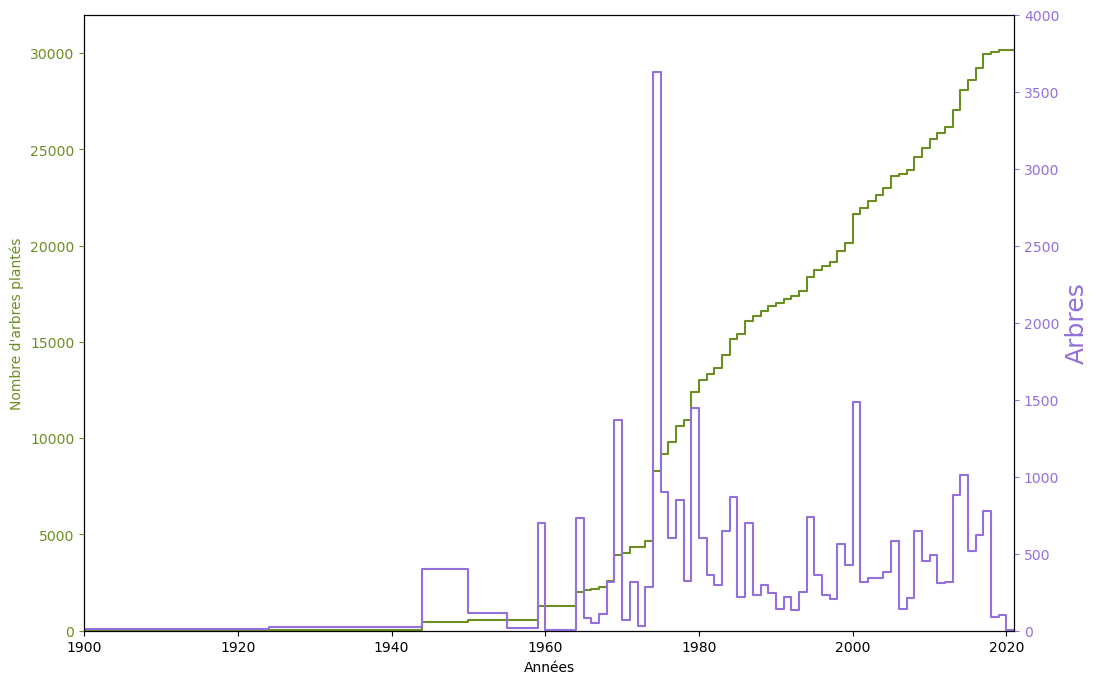

In [170]:
#plt.rcParams.update({'font.size': 18})

colors = mcolors.CSS4_COLORS

fig = plt.figure(figsize=(12, 8))
ax = fig.subplots()

ax.plot(df.cumsum(),c=colors["olivedrab"], drawstyle='steps')

ax.set_xlabel("Années", loc="center")
ax.set_xlim([1900, 2021])

ax.set_ylabel("Nombre d'arbres plantés", loc="center", c=colors["olivedrab"])
ax.set_ylim([0, 32000])
ax.yaxis.label.set_color(colors["olivedrab"])
ax.tick_params(axis='y', colors=colors["olivedrab"])

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.fill(df, facecolor='lightsalmon', edgecolor='orangered', linewidth=1)
ax2.plot(df, c=colors["mediumpurple"], drawstyle='steps')
##
ax2.set_ylabel("Arbres", c=colors["mediumpurple"], fontsize=18)  # we already handled the x-label with ax1
ax2.set_ylim([0, 4000])
ax2.yaxis.label.set_color(colors["mediumpurple"])
ax2.tick_params(axis='y', colors=colors["mediumpurple"])

# fig.legend(handler+handler1, label+label1, loc='upper center', title='ax.legend')
#ax.plot(df,c=colors["darkblue"], drawstyle='steps')

